In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt
%load_ext autoreload
%autoreload 2

In [2]:
from scratch import fetch_url

## Grid

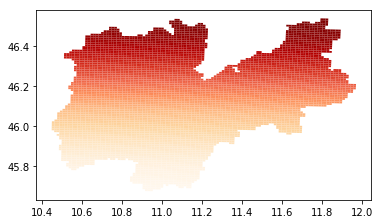

In [2]:
path = './data/trentino-grid.geojson'
grid_raw = gpd.read_file(path)
grid_raw.plot(cmap='OrRd');

In [111]:
social_pulse = fetch_url(1000,grid_raw,social=True)

100%|██████████| 1000/1000 [01:58<00:00,  8.46it/s]


In [105]:
# coordinates = [social_pulse.iloc[i,:]['geometry']['coordinates'] for i in range(len(social_pulse))]
# # from shapely.geometry import Point
# points = [Point(social_pulse.iloc[i,:]['geometry']['coordinates']) for i in range(len(social_pulse))]
# social_pulse['coordinates'] = coordinates
# social_pulse['geometry'] = points

In [114]:
social_pulse.head(4)

,geometry,timestamp,grid_id
0,POINT (11.13 46.07),2013-10-31 23:04:16,5201
1,POINT (10.83 46.23),2013-10-31 23:01:14,7167
2,POINT (11.46 46.29),2013-10-31 23:43:03,8151
3,POINT (11.04 45.89),2013-10-31 23:38:37,2855


In [6]:
# social_pulse['x'] = [social_pulse['coordinates'].iloc[i][0] for i in range(len(social_pulse))]
# social_pulse['y'] = [social_pulse['coordinates'].iloc[i][1] for i in range(len(social_pulse))]

In [117]:
# np.unique([social_pulse.geometry[i]['type'] for i in range(len(social_pulse))])

In [118]:
grid_raw.head(3)

,cellId,geometry
0,38,"POLYGON ((10.91462237795798 45.68200707615051,..."
1,39,"POLYGON ((10.92745626753757 45.68179119797432,..."
2,40,"POLYGON ((10.94029001069759 45.68157387892596,..."


In [119]:
pd.to_datetime(social_pulse['timestamp'][0])

Timestamp('2013-10-31 23:04:16')

In [120]:
# import dt
# pd.to_datetime(social_pulse['timestamp'],unit='s')

In [122]:
test = [social_pulse['geometry'][0].within(grid_raw['geometry'][i]) for i in range(len(grid_raw))]
print(grid_raw['geometry'][np.where(test)[0]])

2447    POLYGON ((11.12213278041716 46.07437127807363,...
Name: geometry, dtype: object


## Time syncronize



In [162]:
from scratch import fetch_url
weather = fetch_url(20000,grid_raw,weather=True)
weather['temperature'] = (weather['maxTemperature']+weather['minTemperature'])/2

100%|██████████| 2195/2195 [04:40<00:00,  7.81it/s]


In [395]:
weather['temperature_diff'] = (weather['maxTemperature']-weather['minTemperature'])

In [396]:
# calculate the average temperature and save into the new file
ave_temp = weather.groupby(['timestamp','grid_id'])['temperature'].mean().unstack().reset_index()
ave_temp.to_csv('./data/average_temp.csv')

diff_temp = weather.groupby(['timestamp','grid_id'])['temperature_diff'].mean().unstack().reset_index()
diff_temp.to_csv('./data/temp_diff.csv')

current:  min is 2013-11-01 00:00:00 and max is 2013-11-30 23:50:00
temperature:  min is 2013-10-31 23:00:00 and max is 2013-12-30 23:00:00
precipitation:  min is 2013-11-01 00:00:00 and max is 2013-12-26 21:10:00
air_quality:  min is 2013-11-01 00:00:00 and max is 2013-12-31 00:00:00


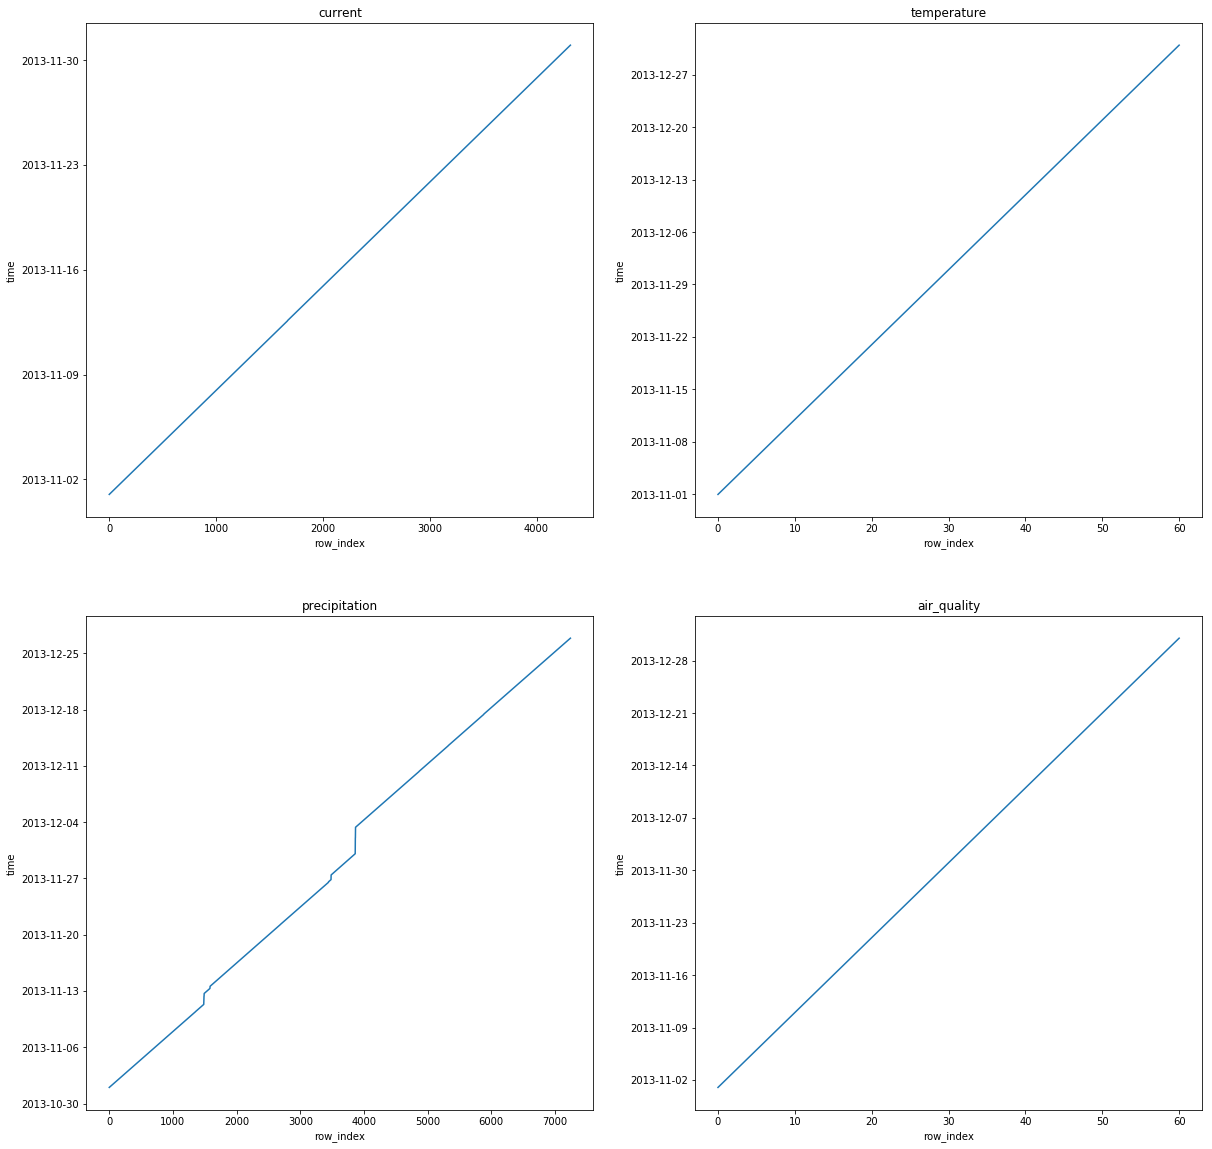

common time is from 2013-11-01 00:00:00 to 2013-11-30 23:50:00
2013-11-01 00:00:00
2013-11-01 23:00:00
2013-11-01 00:00:00
2013-11-01 00:00:00


current:  min is 2013-11-01 00:00:00 and max is 2013-11-30 23:50:00
temperature:  min is 2013-11-01 23:00:00 and max is 2013-11-30 23:00:00
precipitation:  min is 2013-11-01 00:00:00 and max is 2013-11-30 01:40:00
air_quality:  min is 2013-11-01 00:00:00 and max is 2013-11-30 00:00:00


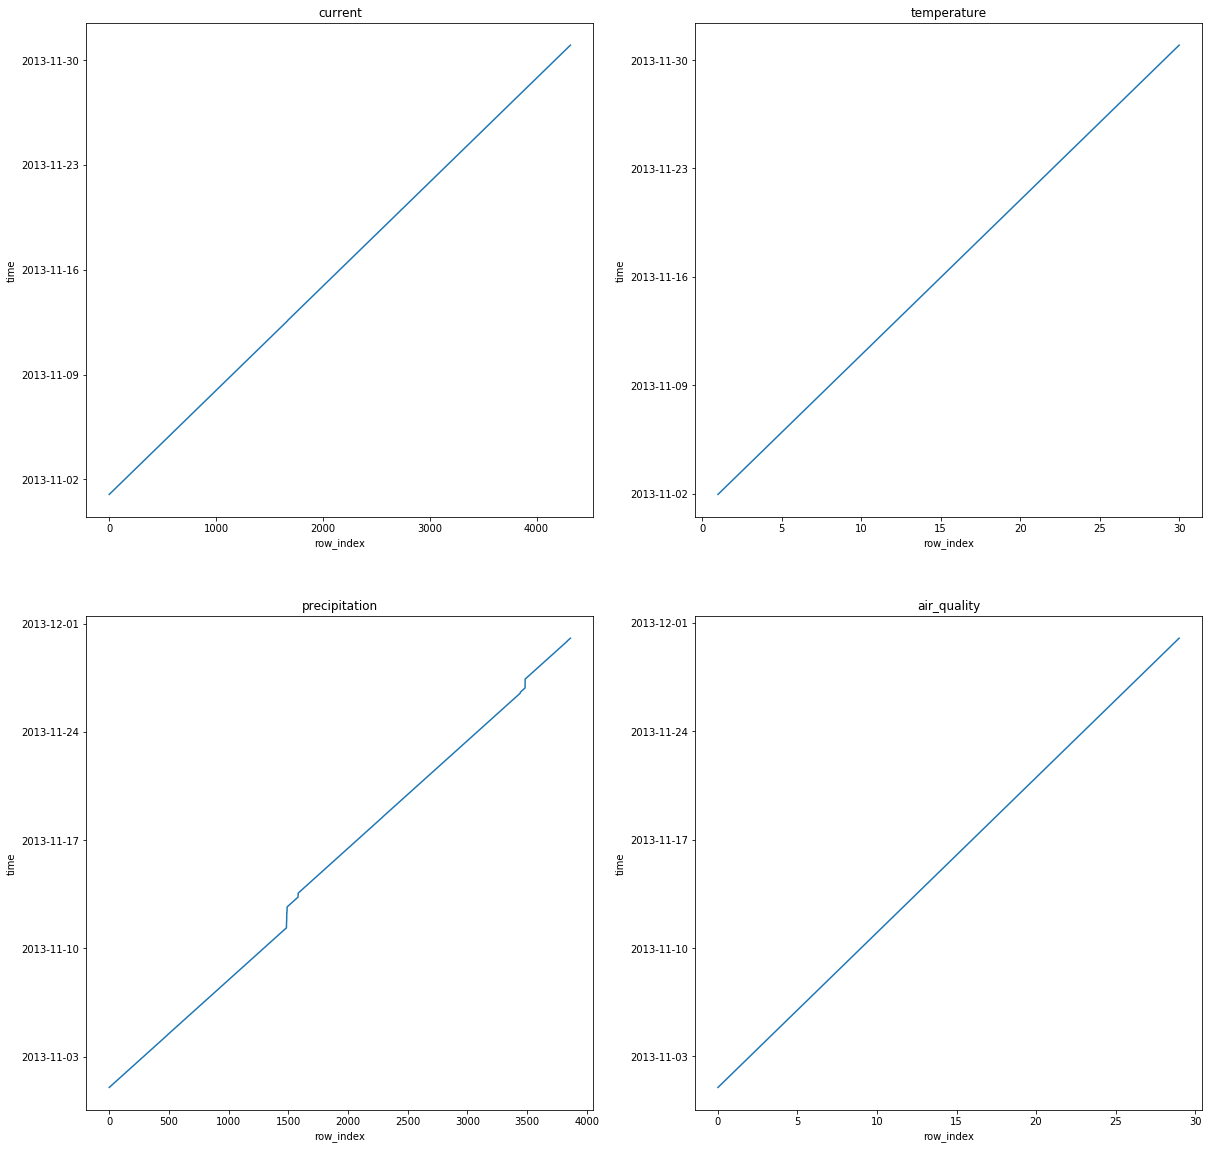

In [312]:
plot_time(synchronized_elements,ele)

In [313]:
synchronized_elements[0].head(3)

,timestamp,155,272,273,276,277,389,390,393,506,...,10980,10981,10982,10983,10984,11097,11098,11099,hour,date
0,2013-11-01 00:00:00,0.101565,1.828174,0.533217,0.829945,0.073230,1.650435,0.203130,0.610254,0.304696,...,0.281828,0.128104,0.219878,0.971284,0.388514,0.025621,0.153725,0.076862,0,2013-11-01
1,2013-11-01 00:10:00,0.086957,1.565217,0.456522,0.836692,0.073826,1.413043,0.173913,0.615215,0.260870,...,0.282449,0.128386,0.222637,0.984797,0.393919,0.025677,0.154063,0.077032,0,2013-11-01
2,2013-11-01 00:20:00,0.093913,1.690435,0.493043,0.796207,0.070254,1.526087,0.187826,0.585447,0.281739,...,0.284932,0.129515,0.224552,0.993243,0.397297,0.025903,0.155418,0.077709,0,2013-11-01


the difference for current in hours is 0.166667 hour
the difference for temperature in hours is 24.000000 hour
the difference for precipitation in hours is 0.166667 hour
the difference for air_quality in hours is 24.000000 hour


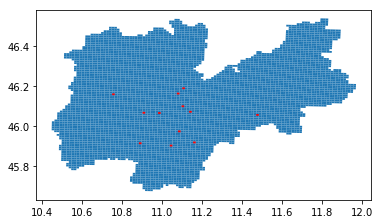

In [342]:
base = (grid_raw['geometry']).plot()
(grid_raw.loc[grid_raw['cellId'].isin(common_grids)])['geometry'].plot(ax=base,color='r')
plt.show()

array(['2972', '3077', '3215', '3911', '5067', '5073', '5111', '5202',
       '5550', '6225', '6367', '6720'], dtype='<U21')

In [16]:
choose = ['5550','2972','5202','3215','5111']


choose

'5550'

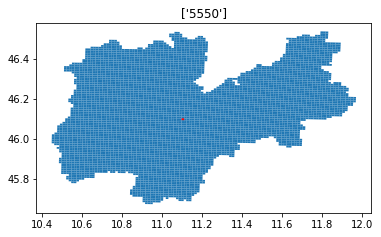

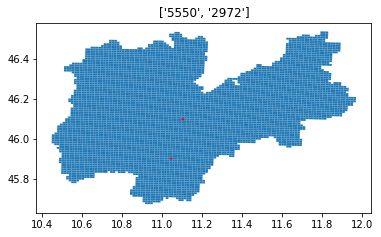

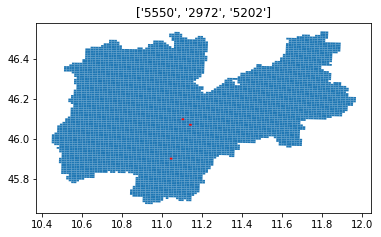

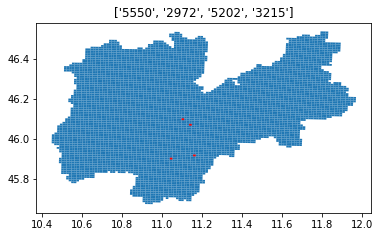

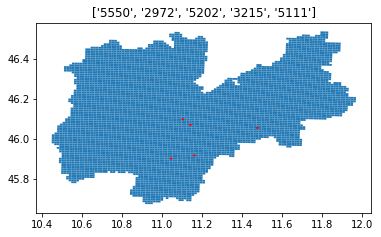

In [24]:
# print([(np.max(commen_current[i]),i) for i in common_grids])
choose = ['5550','2972','5202','3215','5111']
for i in range(len(choose)):
    base = (grid_raw['geometry']).plot()
    (grid_raw.loc[grid_raw['cellId'].isin(choose[:i+1])])['geometry'].plot(ax=base,color='r')
    plt.title(str(choose[:i+1]))
    plt.show()

In [407]:
choose = ['timestamp','5550','2972','5202','3215','5111','hour','date']
common_elements = select_common(common_elements,choose)
[commen_current,commen_temperature,commen_precipitation,commen_air_quality] = common_elements

In [419]:
commen_precipitation['2972'].unique()

array([0, 1, 2, 3])

In [413]:
hourly_current = commen_current.groupby(['date','hour']).sum().reset_index()
hourly_current.head(3)

,date,hour,2972,3215,5111,5202,5550
0,2013-11-01,0,163.221348,70.749732,28.187308,100.041343,197.423745
1,2013-11-01,1,152.863255,73.326613,27.262405,90.869062,192.954144
2,2013-11-01,2,147.114838,71.580059,24.186424,86.638406,181.545951


In [414]:
daily_temperature = commen_temperature.groupby(['date']).sum().reset_index()
daily_temperature.head(3)

,date,2972,3215,5111,5202,5550,hour
0,2013-11-01,13.95,9.60,12.15,13.45,14.35,23
1,2013-11-02,15.20,8.20,10.00,14.00,14.90,23
2,2013-11-03,9.90,6.15,7.75,8.60,9.50,23


In [417]:
hourly_precipitation = commen_precipitation.groupby(['date','hour']).sum().reset_index()
hourly_precipitation.head(3)

,date,hour,2972,3215,5111,5202,5550
0,2013-11-01,0,0,0,0,0,0
1,2013-11-01,1,0,0,0,0,0
2,2013-11-01,2,0,0,0,0,0


In [415]:
daily_air_quality =  commen_air_quality.groupby(['date']).sum().reset_index()
daily_air_quality.head(3)

,date,2972,3215,5111,5202,5550,hour
0,2013-11-01,0.0,0.0,0.0,1.714286,1.444444,0
1,2013-11-02,0.0,0.0,5.0,1.750000,0.000000,0
2,2013-11-03,0.0,0.0,0.0,1.571429,2.000000,0


In [421]:
grids = list(hourly_current.columns)
grids

['date', 'hour', '2972', '3215', '5111', '5202', '5550']

,date,hour,current,precipitation,temperature,air_quality
0,2013-11-01,0,163.221348,0,13.95,0.0
1,2013-11-01,1,152.863255,0,13.95,0.0
2,2013-11-01,2,147.114838,0,13.95,0.0
3,2013-11-01,3,138.234974,0,13.95,0.0
4,2013-11-01,4,138.366296,0,13.95,0.0
5,2013-11-01,5,150.852680,0,13.95,0.0
6,2013-11-01,6,162.931122,0,13.95,0.0
7,2013-11-01,7,173.202658,0,13.95,0.0
8,2013-11-01,8,198.729374,0,13.95,0.0
9,2013-11-01,9,216.391523,0,13.95,0.0
